## Linear and Quadratic Discriminant analysis

LDA and QDA are supervised classification techniques. LDA can also be used for dimensionality reduction. In the below example we will use LDA and QDA on Iris dataset.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02, plotDecisionSurface=True):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    if plotDecisionSurface:
        # plot the decision surface
        x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
        Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
        Z = Z.reshape(xx1.shape)
        plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [3]:
#import iris dataset
from sklearn import datasets

iris = datasets.load_iris()
#load only two features
X = iris.data[:,[2,3]]
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_test:', np.bincount(y_test))
print('Labels counts in y_train:', np.bincount(y_train))

Labels counts in y: [50 50 50]
Labels counts in y_test: [15 15 15]
Labels counts in y_train: [35 35 35]


In [4]:
#Standardize the features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [5]:
#Lets apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
y_lda_train_pred = lda.fit(X_train_std, y_train).predict(X_train_std)
y_lda_test_pred = lda.predict(X_test_std)

<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-6-9eee3595b32d>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'LDA')

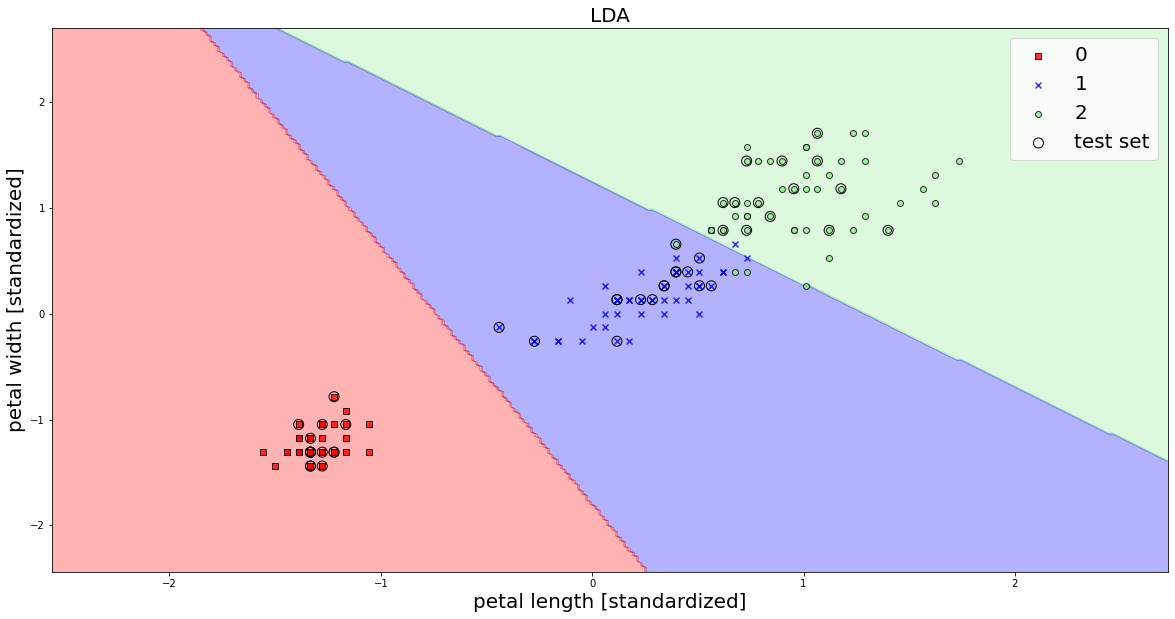

In [6]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=lda, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('LDA', fontsize=20)

In [7]:
#Confusion matrix of LDA
from sklearn.metrics import confusion_matrix
lda_confusion_matrix_train = confusion_matrix(y_train, y_lda_train_pred)
lda_confusion_matrix_test = confusion_matrix(y_test, y_lda_test_pred)

In [8]:
print("LDA confusion_matrix train:\n", lda_confusion_matrix_train)
print("LDA confusion_matrix test:\n", lda_confusion_matrix_test)

LDA confusion_matrix train:
 [[35  0  0]
 [ 0 33  2]
 [ 0  3 32]]
LDA confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


In [9]:
#LDA coefficients
print("LDA coeff =",lda.coef_,"intercept =",lda.intercept_)

LDA coeff = [[-16.98247562  -8.6292218 ]
 [  4.46018686   0.1692449 ]
 [ 12.52228875   8.4599769 ]] intercept = [-17.5422435   -1.715496   -12.14545277]


In [10]:
#Lets apply QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
y_qda_train_pred = qda.fit(X_train_std, y_train).predict(X_train_std)
y_qda_test_pred = qda.predict(X_test_std)

<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-11-8c426c08c03e>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'QDA')

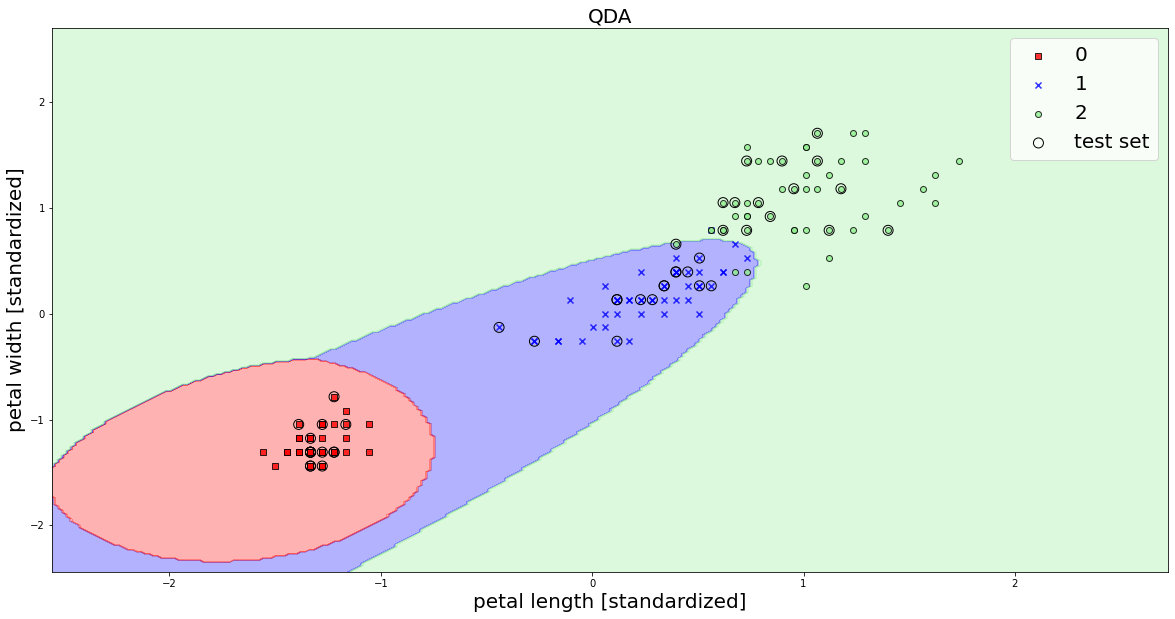

In [11]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=qda, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('QDA', fontsize=20)

In [12]:
#Confusion matirx of QDA
from sklearn.metrics import confusion_matrix
qda_confusion_matrix_train = confusion_matrix(y_train, y_qda_train_pred)
qda_confusion_matrix_test = confusion_matrix(y_test, y_qda_test_pred)

In [13]:
print("QDA confusion_matrix train:\n", qda_confusion_matrix_train)
print("QDA confusion_matrix test:\n", qda_confusion_matrix_test)

QDA confusion_matrix train:
 [[35  0  0]
 [ 0 34  1]
 [ 0  2 33]]
QDA confusion_matrix test:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-14-4418562fdf80>:8: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'LDA')

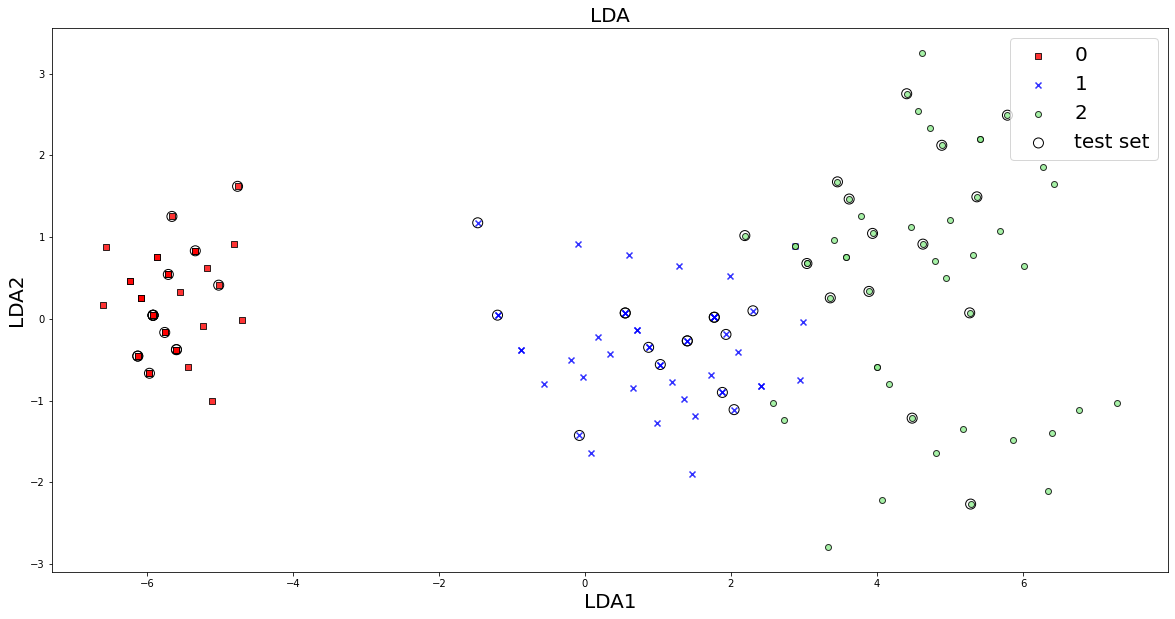

In [14]:
#Now lets transform the variables with LDA 
X_lda = lda.transform(X_combined_std)
plt.figure(figsize=(20,10))
plot_decision_regions(X_lda, y_combined, classifier=None, test_idx=range(105,150), plotDecisionSurface=False)
plt.xlabel('LDA1', fontsize=20)
plt.ylabel('LDA2', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('LDA', fontsize=20)

As you can see from the above plot **LDA** has transformed variables to the coordinates in which classes are maximally separated.

### Lets implement LDA and QDA below

Decision theory for classification says we need to know $P(Y=k|X=x)$ (conditional probability of observing a class $k$ given a data point $x$). Let's define $f_k(x)$ class conditional density of $x$, $P(X=x|Y=k)$, and let $\pi_k$ be the prior probability of class $k$. By Bayes rule:

$P(Y=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l=1}^{K} f_l(x)\pi_l}$. Suppose we model each class density as multivariate Gaussian.

$f_k(x) = \frac{1}{(2\pi)^{p/2} \left | \Sigma_k \right |^{1/2}} e^{-\frac{1}{2}}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)$.

**LDA** arises in the special case when we assume the classes have a common covariance matrix $\Sigma_k = \Sigma \text{ } \forall k$.
Comparing two classes $k$ and $l$ and equating their $log $ probabilities, we get.

$P(Y=k|X=x) = P(Y=l|X=x)$ 

$\text{log} \frac{P(Y=k|X=x)}{P(Y=l|X=x)} = \text{log} \frac{f_k(x)}{f_l(x)} + \text{log} \frac{\pi_k}{\pi_l} = 0$

$=\text{log} \frac{\pi_k}{\pi_l} - \frac{1}{2}(\mu_k+\mu_l)^T\Sigma^{-1}(\mu_k-\mu_l)+x^T\Sigma^{-1}(\mu_k-\mu_l)$

From the above we can define a discriminant function as:

$\delta_k(x)=x^T\Sigma^{-1}\mu_k-\frac{1}{2}\mu^T_k\Sigma^{-1}\mu_k+\text{log}\pi_k$, and we classify to the class where $\delta_k(x)$ is the maximum. For **QDA** the $\Sigma_k$s don't cancel and we have

$\delta_k(x) = -\frac{1}{2}\text{log}\left | \Sigma_k \right | - \frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k)+\text{log}\pi_k$.

$\pi_k$, $\mu_k$ and $\Sigma$ are estimated as.

$\hat{\pi}_k = N_k/N$, where $N_k$ is the number of class-$k$ observations.

$\hat{\mu_k} = \Sigma_{g_i=k} x_i/N_k$.

$\hat{\Sigma}=\Sigma^{K}_{k=1}\Sigma_{g_i=k}(x_i-\hat{\mu_k})(x_i-\hat{\mu_k})^T/(N-K)$


In [15]:
class LDA():
    def fit(self, X, y):
        #lets estimate parameters
        #Pi
        pi = np.bincount(y)
        pi = pi / y.shape[0]
        NClasses = np.unique(y).shape[0]  

        #Compute mu
        mu = list()
        for e in np.unique(y):
            x_i = X[y==e]
            mu_i = np.mean(x_i, axis=0)
            mu.append(mu_i)

        #Compute Sigma
        sigma = np.zeros((X.shape[1], X.shape[1]))
        for e, mv in zip(np.unique(y),mu):
            x_i = X[y==e]
            a = x_i - mv
            sigma += np.dot(a.T,a)
        sigma /= (X.shape[0]-NClasses) 
        
        sigmaInv = np.linalg.inv(sigma)
        mua = np.array(mu)
        self.intercept_ = np.zeros(NClasses)
        self.coef_ = np.zeros(shape=(NClasses, X.shape[1]))
        for i, (e, mv) in enumerate(zip(np.unique(y), mu)):
            x_i = X[y==e]
            self.coef_[i] = np.matmul(sigmaInv, mv)
            self.intercept_[i] = -0.5*np.matmul(mv.T, self.coef_[i])+np.log(pi[i])  
        
    def predict(self, X):
        NClasses = self.coef_.shape[0]
        prob = np.zeros(shape=(X.shape[0],NClasses))
        for i in range(NClasses):
            prob[:,i] = self.intercept_[i] + np.matmul(X, self.coef_[i])
        return np.argmax(prob, axis=1)
            

In [16]:
myLda = LDA()
myLda.fit(X_train_std, y_train)

#LDA coefficients
print("LDA coeff =",myLda.coef_,"intercept =",myLda.intercept_)

LDA coeff = [[-16.98247562  -8.6292218 ]
 [  4.46018686   0.1692449 ]
 [ 12.52228875   8.4599769 ]] intercept = [-17.5422435   -1.715496   -12.14545277]


Coefficients above **exactly match from sklearn**

<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-17-7d82f352dc57>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'My LDA')

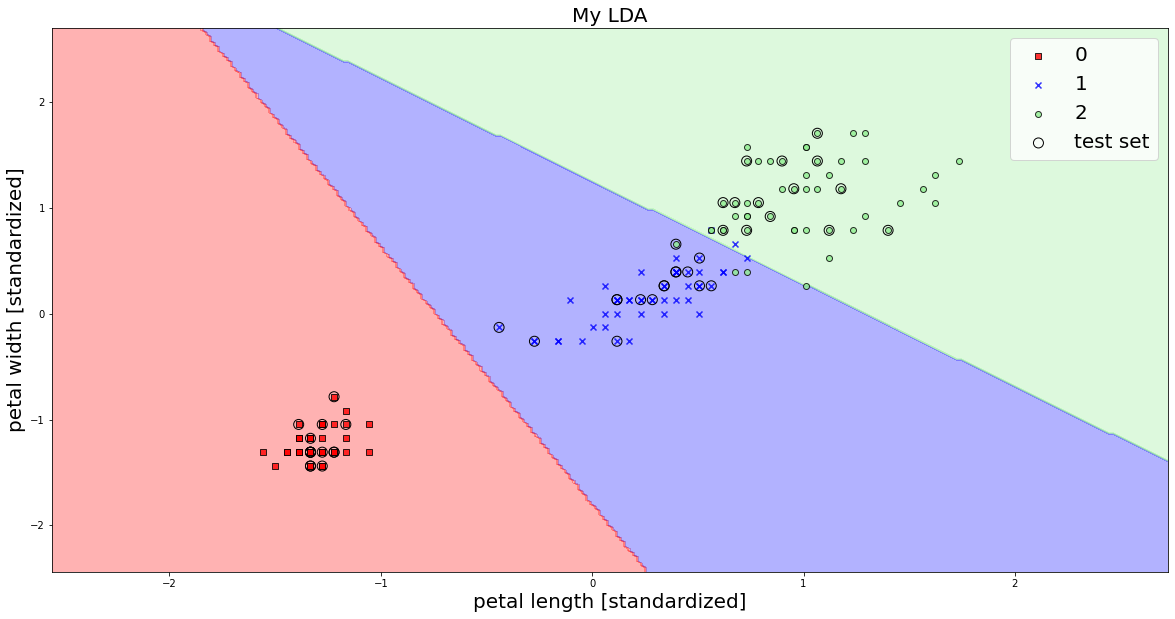

In [17]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=myLda, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('My LDA', fontsize=20)

### QDA


In [18]:
class QDA():
    def __init__(self):
        pass
    
    def fit(self, X, y):
        #lets estimate parameters
        #Pi
        pi = np.bincount(y)
        pi = pi / y.shape[0]
        NClasses = np.unique(y).shape[0]
        
        #Compute mu
        mu = list()
        for e in np.unique(y):
            x_i = X[y==e]
            mu_i = np.mean(x_i, axis=0)
            mu.append(mu_i)

        #Compute Sigma
        sigmas = list()
        for e, mv in zip(np.unique(y),mu):
            x_i = X[y==e]
            a = x_i - mv
            sigmas.append(np.dot(a.T,a)/(x_i.shape[0]-1))
  
        sigmaInvs = list()
        for i in range(NClasses):
            sigmaInvs.append(np.linalg.inv(sigmas[i]))
        mua = np.array(mu)
        self.intercept_ = np.zeros(NClasses)
        self.coef_ = np.zeros(shape=(NClasses, X.shape[1]))
        self.coef2_ = np.zeros(shape=(NClasses, X.shape[1], X.shape[1]))
        
        for i, (e, mv, sigma, sigmaInv) in enumerate(zip(np.unique(y), mu, sigmas, sigmaInvs)):
            x_i = X[y==e]
            self.coef_[i] = np.matmul(sigmaInv, mv)
            self.intercept_[i] = -0.5*np.matmul(mv.T, self.coef_[i])+np.log(pi[i]) -0.5*np.log(np.linalg.det(sigma))
            self.coef2_[i] = -0.5 * sigmaInv
        
    def predict(self, X):
        NClasses = self.coef_.shape[0]
        prob = np.zeros(shape=(X.shape[0],NClasses))
        for i in range(NClasses):
            prob[:,i] = self.intercept_[i] + np.matmul(X, self.coef_[i])
            for elm in range(prob[:,i].shape[0]):
                prob[elm, i ] = prob[elm, i] + np.matmul(np.matmul(X[elm,:], self.coef2_[i]), X[elm,:].T)
        return np.argmax(prob, axis=1)

In [19]:
myQda = QDA()
myQda.fit(X_train_std, y_train)

In [20]:
print("Intercept = ", myQda.intercept_)
print("Coef1 = ", myQda.coef_)
print("Coef2 =", myQda.coef2_)

Intercept =  [-90.41530779   1.41997418  -5.83512209]
Coef1 =  [[-83.37679195 -63.19947541]
 [  5.88761213  -2.10570602]
 [  8.09974747   5.03735067]]
Coef2 = [[[-48.95416517  17.578583  ]
  [ 17.578583   -43.53493638]]

 [[-19.75973889  14.55274157]
  [ 14.55274157 -17.48432316]]

 [[ -5.6669333    1.64754052]
  [  1.64754052  -3.88150177]]]


<ipython-input-2-fd12fa515296>:34: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  plt.scatter(X_test[:, 0],
<ipython-input-21-b2f2af7c80fc>:7: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  plt.axis(fontsize=20)


Text(0.5, 1.0, 'My QDA')

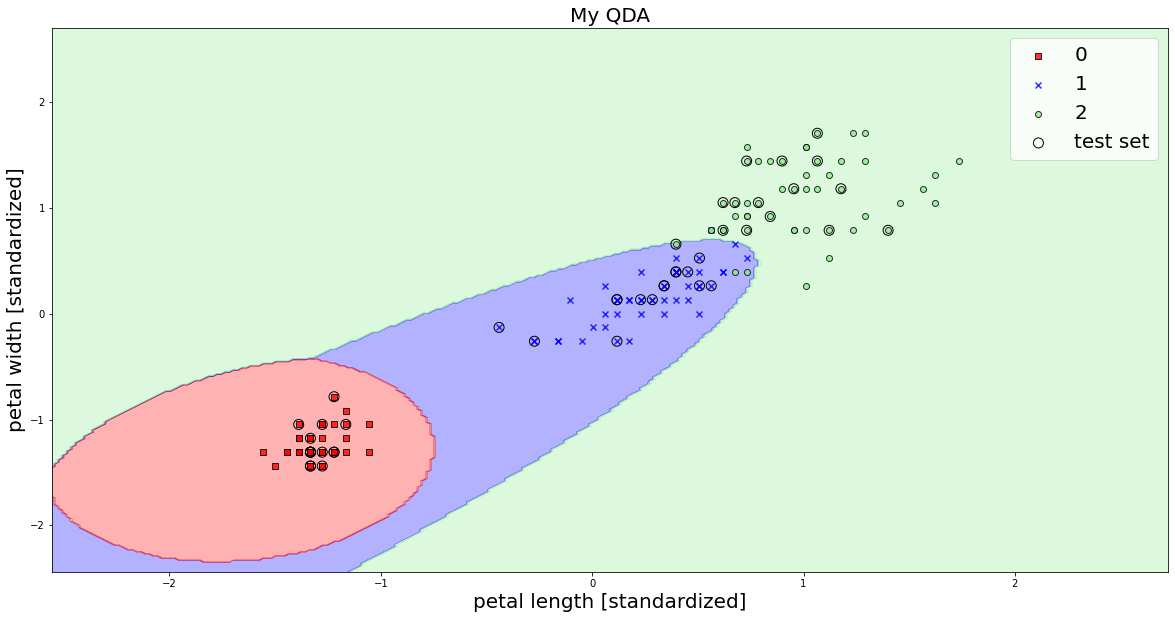

In [21]:
#Plot the decision boundary
plt.figure(figsize=(20,10))
plot_decision_regions(X_combined_std, y_combined, classifier=myQda, test_idx=range(105,150))
plt.xlabel('petal length [standardized]', fontsize=20)
plt.ylabel('petal width [standardized]', fontsize=20)
plt.legend(fontsize=20)
plt.axis(fontsize=20)
plt.title('My QDA', fontsize=20)

#### MyQDA matches with QDA from sklearn